# Import basic libraries

In [48]:
import sklearn.metrics as sm
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords

In [49]:
%matplotlib inline

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Importing the dataset

In [52]:
expenses_dataset = pd.read_csv('ExpenseData2.csv')

## Display the dataset

In [53]:
expenses_dataset

,Date,Place,Item,Quantity,Price,Category
0,1/9/2023,Arpico Super Store,Prima Kottumee,5.0,650.0,Food
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1.0,1800.0,Medical
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1.0,3100.0,Medical
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7.0,22.0,Medical
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7.0,350.0,Medical
...,...,...,...,...,...,...
30190,NaN,NaN,Cookers (Gas),NaN,NaN,Housing and Bills
30191,NaN,NaN,"Mixing machines , Grinders, Beaters",NaN,NaN,Housing and Bills
30192,NaN,NaN,Irons,NaN,NaN,Housing and Bills
30193,NaN,NaN,Refrigerators,NaN,NaN,Housing and Bills


In [54]:
expenses_dataset['Total'] = expenses_dataset['Price'] * expenses_dataset['Quantity']

In [55]:
expenses_dataset['Month'] = expenses_dataset['Date'].str[0]

In [56]:
expenses_dataset.head()

,Date,Place,Item,Quantity,Price,Category,Total,Month
0,1/9/2023,Arpico Super Store,Prima Kottumee,5.0,650.0,Food,3250.0,1
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1.0,1800.0,Medical,1800.0,1
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1.0,3100.0,Medical,3100.0,1
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7.0,22.0,Medical,154.0,1
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7.0,350.0,Medical,2450.0,1


In [57]:
expenses_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30195 entries, 0 to 30194
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      29759 non-null  object 
 1   Place     29759 non-null  object 
 2   Item      30195 non-null  object 
 3   Quantity  29759 non-null  float64
 4   Price     29759 non-null  float64
 5   Category  30195 non-null  object 
 6   Total     29759 non-null  float64
 7   Month     29759 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.8+ MB


In [58]:
len(expenses_dataset.Category.value_counts())

6

In [59]:
expenses_dataset.Category.unique()

array(['Food', 'Medical', 'Housing and Bills', 'Personal Care',
       'Transport', 'Other'], dtype=object)

## Generates descriptive statistics

In [60]:
expenses_dataset.describe()

,Quantity,Price,Total
count,29759.00000,29759.000000,29759.000000
mean,1.00289,386.827548,389.956685
std,0.12855,318.035434,383.121829
min,1.00000,10.000000,30.000000
25%,1.00000,207.000000,207.000000
50%,1.00000,311.000000,311.000000
75%,1.00000,416.000000,416.000000
max,7.00000,12900.000000,20160.000000


# Data Preprocessing

 ## Checking For Nulls

In [61]:
sum(expenses_dataset.isnull().sum())

2616

In [62]:
expenses_dataset.isnull().sum()

Date        436
Place       436
Item          0
Quantity    436
Price       436
Category      0
Total       436
Month       436
dtype: int64

<Axes: >

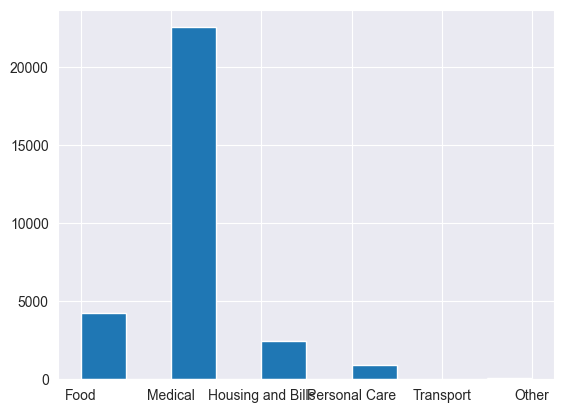

In [63]:
expenses_dataset["Category"].hist()

## Dropping duplicates


In [64]:
expenses_dataset.shape

(30195, 8)

In [65]:
new = expenses_dataset.drop_duplicates(inplace=True)

In [66]:
expenses_dataset.shape

(30187, 8)

In [67]:
fig = px.pie(expenses_dataset, values="Total", names="Category")
fig.show()

In [68]:
fig = px.histogram(expenses_dataset, x="Month", y="Total")
fig.show()

In [69]:
print(expenses_dataset['Item'].apply(lambda x: len(x.split(' '))).sum())

73747


In [70]:
le = LabelEncoder()
expenses_dataset['Category_enc'] = le.fit_transform(expenses_dataset['Category'])
display(expenses_dataset.head())

,Date,Place,Item,Quantity,Price,Category,Total,Month,Category_enc
0,1/9/2023,Arpico Super Store,Prima Kottumee,5.0,650.0,Food,3250.0,1,0
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1.0,1800.0,Medical,1800.0,1,2
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1.0,3100.0,Medical,3100.0,1,2
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7.0,22.0,Medical,154.0,1,2
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7.0,350.0,Medical,2450.0,1,2


Category
Food                 3.082079
Housing and Bills    2.072452
Medical              2.363552
Other                2.625000
Personal Care        2.075878
Transport            3.529412
Name: word_count, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_15224\458628634.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\acer\Desktop\Billcategorize\venv\lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning:

Mean of empty slice.

C:\Users\acer\Desktop\Billcategorize\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\acer\Desktop\Billcategorize\venv\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning:

invalid value encountered in divide

C:\Users\acer\AppData\Local\Temp\ipykernel_15224\458628634.py:4: UserWarning:



`distplot` is a deprecated function and will be

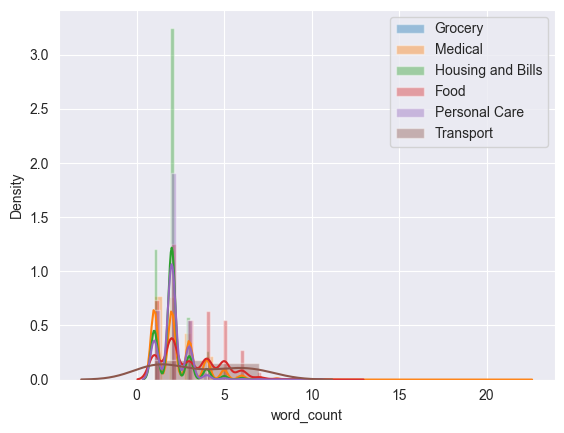

In [71]:
expenses_dataset['word_count'] = expenses_dataset['Item'].str.split().str.len()
print(expenses_dataset.groupby('Category')['word_count'].mean())
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Grocery']['word_count'], label='Grocery')
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Medical']['word_count'], label='Medical'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Housing and Bills']['word_count'], label='Housing and Bills'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Food']['word_count'], label='Food'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Personal Care']['word_count'], label='Personal Care'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Transport']['word_count'], label='Transport'),
plt.legend()
plt.show()

In [72]:
import nltk

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:

# Make the letters lower case and tokenize the words
tokenized_items = expenses_dataset['Item'].str.lower().apply(word_tokenize)

print(tokenized_items)

0                                  [prima, kottumee]
1                              [x-ray, dental, iopa]
2            [x-ray, dental, opg, -, hospital, view]
3                                   [glemaz, -, 2mg]
4                               [glucophage, -, 2mg]
                            ...                     
30190                           [cookers, (, gas, )]
30191    [mixing, machines, ,, grinders, ,, beaters]
30192                                        [irons]
30193                                [refrigerators]
30194                   [oven, (, gas/, electric, )]
Name: Item, Length: 30187, dtype: object


## Preprocessing the text

In [75]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

tokenized_items = tokenized_items.apply(alpha)

print(tokenized_items)


0                            [prima, kottumee]
1                               [dental, iopa]
2                [dental, opg, hospital, view]
3                                     [glemaz]
4                                 [glucophage]
                         ...                  
30190                           [cookers, gas]
30191    [mixing, machines, grinders, beaters]
30192                                  [irons]
30193                          [refrigerators]
30194                         [oven, electric]
Name: Item, Length: 30187, dtype: object


In [76]:
# Define a function to lemmatization
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token in tokens:
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_items = tokenized_items.apply(lemmatize)

print(tokenized_items)

0                       prima kottumee
1                          dental iopa
2             dental opg hospital view
3                               glemaz
4                           glucophage
                     ...              
30190                       cooker gas
30191    mixing machine grinder beater
30192                             iron
30193                     refrigerator
30194                    oven electric
Name: Item, Length: 30187, dtype: object


In [77]:
# Replace the columns with tokenized messages
expenses_dataset['Item'] = tokenized_items

display(expenses_dataset.head())

,Date,Place,Item,Quantity,Price,Category,Total,Month,Category_enc,word_count
0,1/9/2023,Arpico Super Store,prima kottumee,5.0,650.0,Food,3250.0,1,0,2
1,1/9/2023,BlueCrossLife,dental iopa,1.0,1800.0,Medical,1800.0,1,2,3
2,1/9/2023,BlueCrossLife,dental opg hospital view,1.0,3100.0,Medical,3100.0,1,2,6
3,1/9/2023,IUS Pharmacy & Grocery,glemaz,7.0,22.0,Medical,154.0,1,2,3
4,1/9/2023,IUS Pharmacy & Grocery,glucophage,7.0,350.0,Medical,2450.0,1,2,3


In [78]:
print(expenses_dataset['Item'].apply(lambda x: len(x.split(' '))).sum())

69237


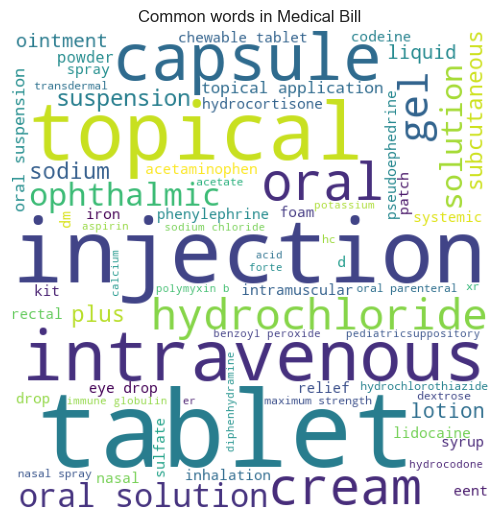

In [79]:

# Get the ham messages
medical = expenses_dataset[expenses_dataset['Category']=='Medical']['Item'].str.cat(sep=', ')

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of message
medical_wc = wc.generate(medical)

# plot the world cloud for medical                       
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(medical_wc) 
plt.axis("off")
plt.title("Common words in Medical Bill")
plt.tight_layout(pad = 0) 
plt.show() 

## Train Test split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(expenses_dataset['Item'], expenses_dataset['Category'], test_size=0.3, random_state = 0)

In [81]:
X_train

2750                                        benzac w wash
29310                          zoo and aquarium admission
22671                                  zoo friend gummies
15609                                              palgic
23414                                                ziti
                               ...                       
13123                             methocarbamol injection
19648                                     swabflush flush
9845                                            hellebore
10799    insulin lispro protamine and insulin lispro vial
2732                                   bensal hp ointment
Name: Item, Length: 21130, dtype: object

In [82]:
y_train

2750               Medical
29310    Housing and Bills
22671              Medical
15609              Medical
23414                 Food
               ...        
13123              Medical
19648              Medical
9845               Medical
10799              Medical
2732               Medical
Name: Category, Length: 21130, dtype: object

In [83]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21130,), (9057,), (21130,), (9057,))

In [84]:
# Vectorize the training data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

## Applying Naive Bayes Classifier

In [85]:
import pickle

# Train the Naive Bayes classifier
nb = MultinomialNB()
modal = nb.fit(X_train_vect, y_train)
# pickle.dump(modal, open("itemClassificationModal.h5", 'wb'))



In [86]:
# Vectorize the testing data and make predictions
X_test_vect = vectorizer.transform(X_test)
y_pred = nb.predict(X_test_vect)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [88]:
print('Accuracy:', accuracy)
print('Confusion matrix:', confusion)

Accuracy: 0.9365131942144198
Confusion matrix: [[1118   12  159    0    1    0]
 [  35  572  115    0    2    0]
 [  37   17 6689    0    2    0]
 [   2   13    6    0    0    0]
 [   8   33  128    0  103    0]
 [   1    4    0    0    0    0]]


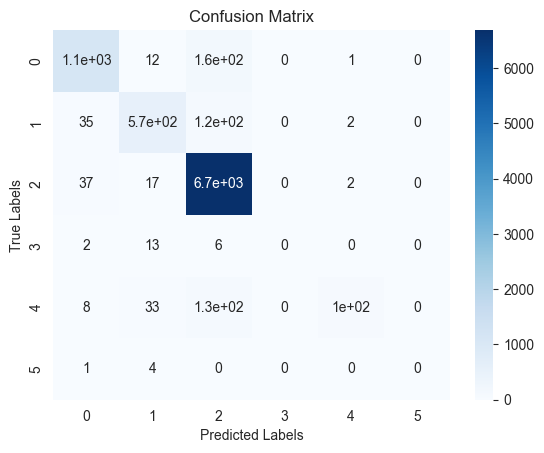

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


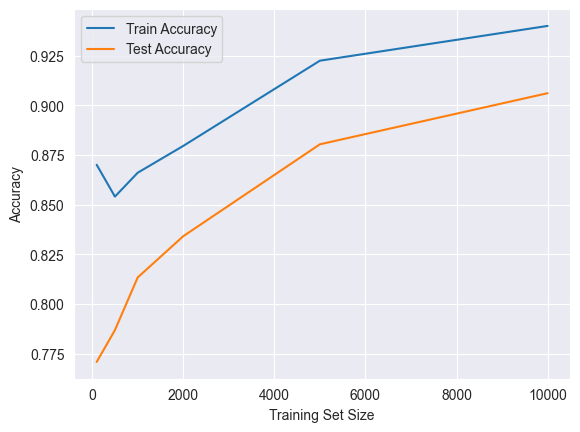

In [89]:
# Evaluate the accuracy of the classifier on the training and testing sets
train_accuracy = []
test_accuracy = []
training_sizes = [100, 500, 1000, 2000, 5000, 10000]
for size in training_sizes:
    X_train_sample, y_train_sample = X_train[:size], y_train[:size]
    X_train_vect_sample = vectorizer.transform(X_train_sample)
    nb.fit(X_train_vect_sample, y_train_sample)
    train_accuracy.append(nb.score(X_train_vect_sample, y_train_sample))
    test_accuracy.append(nb.score(vectorizer.transform(X_test), y_test))

# Plot the accuracy graph
plt.plot(training_sizes, train_accuracy, label='Train Accuracy')
plt.plot(training_sizes, test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [90]:
new_expense = ['chicken palandi kottu']
new_expense_vect = vectorizer.transform(new_expense)
predicted_category = nb.predict(new_expense_vect)

print(predicted_category)

['Food']


In [91]:
with open('./model.pkl', 'wb') as file2:
    pickle.dump(nb, file2)
with open('./vec.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

file.close()
file2.close()

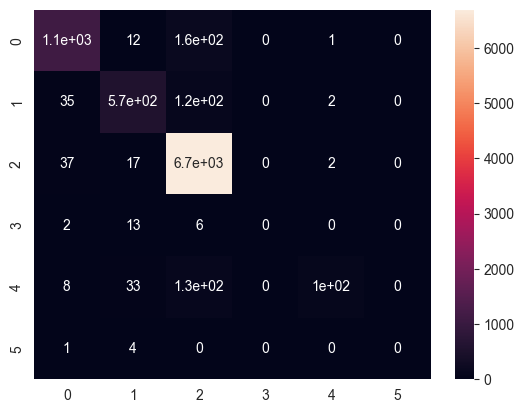

In [92]:
# plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
# sns.heatmap(mat, square = True, annot=True, xticklabels=False,yticklabels=False)
hm = sns.heatmap(data=mat,
                annot=True)
plt.show()

In [93]:
import pickle as cPickle
# save the classifier
with open('expenses_classifier.pkl', 'wb') as fid:
    cPickle.dump(modal, fid)